# Grand Projet : Analyse des performances d’une chaîne de supermarchés en expansion

### Contexte :
- La chaîne de supermarchés « Super-Achats » s’est rapidement développée dans plusieurs villes, mais elle doit mieux comprendre ses ventes, ses clients, et ses performances globales pour rester compétitive.
- Le directeur, Monsieur **Chris**, a rassemblé des données sur les ventes de ses supermarchés, les catégories de produits, les performances de ses employés, et les retours clients pour la dernière année. 
- Il vous demande de fournir un rapport complet afin de l’aider à prendre des décisions stratégiques.


## Objectifs généraux :
En tant que data analyst, votre mission est de :
- Analyser les ventes mensuelles pour chaque supermarché.
- Identifier les catégories de produits les plus vendues.
- Étudier la répartition des dépenses des clients par catégorie.
- Visualiser la performance des employés (ventes, service client, etc.).
- Analyser les retours clients pour comprendre les mois les plus satisfaisants ou problématiques.
- Recommander des stratégies d'amélioration basées sur les analyses.


#### Données  pour ce projet :
### Ventes :
- Store_ID: Identifiant du supermarché
- Date: Date de la vente
- Product_Category: Catégorie de produit
- Quantity: Quantité vendue
- Price: Prix unitaire
- Total_Sales: Calcul automatique (Prix x Quantité)

### Employés :
- Employee_ID: Identifiant de l'employé
- Store_ID: Identifiant du supermarché
- Employee_Name: Nom de l'employé
- Sales_Made: Ventes réalisées par l’employé
- Customer_Satisfaction: Score de satisfaction client (1-10)

### Clients :
- Client_ID: Identifiant du client
- Store_ID: Identifiant du supermarché
- Spent: Montant total dépensé
- Product_Category: Catégorie de produit acheté
- Satisfaction_Score: Score de satisfaction donné par le client (1-10)


# Solution détaillée du grand projet :

### Étape 1 : Charger les données et les nettoyer

In [1]:
# importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Charger les fichiers excel
df_ventes = pd.read_excel('supermarche_ventes.xlsx')
df_employes = pd.read_excel('supermarche_employes.xlsx')
df_clients = pd.read_excel('supermarche_clients.xlsx')


In [3]:
# Afficher un aperçu des données de vente
df_ventes

,Store_ID,Date,Product_Category,Quantity,Price
0,1,2023-01-05,Electronics,3,50.0
1,2,2023-01-07,Groceries,10,5.0
2,1,2023-02-10,Clothing,2,30.0
3,3,2023-03-12,Furniture,1,150.0
4,2,2023-04-18,Groceries,8,7.5
5,4,2023-05-21,Electronics,5,40.0


In [4]:
#dimension du tableau
df_ventes.shape

(6, 5)

In [5]:
#description rapide de la base
df_ventes.describe()

,Store_ID,Date,Quantity,Price
count,6.000000,6,6.000000,6.000000
mean,2.166667,2023-03-03 04:00:00,4.833333,47.083333
min,1.000000,2023-01-05 00:00:00,1.000000,5.000000
25%,1.250000,2023-01-15 12:00:00,2.250000,13.125000
50%,2.000000,2023-02-25 00:00:00,4.000000,35.000000
75%,2.750000,2023-04-08 18:00:00,7.250000,47.500000
max,4.000000,2023-05-21 00:00:00,10.000000,150.000000
std,1.169045,NaN,3.544949,53.441947


In [8]:
df_ventes.describe(include = "all")

,Store_ID,Date,Product_Category,Quantity,Price,Total_Sales
count,6.000000,6,6,6.000000,6.000000,6.000000
unique,NaN,NaN,4,NaN,NaN,NaN
top,NaN,NaN,Electronics,NaN,NaN,NaN
freq,NaN,NaN,2,NaN,NaN,NaN
mean,2.166667,2023-03-03 04:00:00,NaN,4.833333,47.083333,111.666667
min,1.000000,2023-01-05 00:00:00,NaN,1.000000,5.000000,50.000000
25%,1.250000,2023-01-15 12:00:00,NaN,2.250000,13.125000,60.000000
50%,2.000000,2023-02-25 00:00:00,NaN,4.000000,35.000000,105.000000
75%,2.750000,2023-04-08 18:00:00,NaN,7.250000,47.500000,150.000000
max,4.000000,2023-05-21 00:00:00,NaN,10.000000,150.000000,200.000000


In [9]:
df_ventes["Product_Category"]

0    Electronics
1      Groceries
2       Clothing
3      Furniture
4      Groceries
5    Electronics
Name: Product_Category, dtype: object

In [10]:
df_ventes["Product_Category"].unique()

array(['Electronics', 'Groceries', 'Clothing', 'Furniture'], dtype=object)

In [11]:
df_ventes["Product_Category"].value_counts()

Product_Category
Electronics    2
Groceries      2
Clothing       1
Furniture      1
Name: count, dtype: int64

In [12]:
# Afficher un aperçu des données des employes
df_employes


,Employee_ID,Store_ID,Employee_Name,Sales_Made,Customer_Satisfaction
0,1,1,Alice,1500,8.5
1,2,2,Bob,2000,7.0
2,3,3,Charlie,1800,9.0
3,4,4,Diana,2200,8.0
4,5,2,Edward,1700,6.5


In [13]:
# Afficher un aperçu des données des clients
df_clients

,Client_ID,Store_ID,Date,Spent,Product_Category,Satisfaction_Score
0,1,1,2023-01-05,100.0,Electronics,9.0
1,2,2,2023-01-07,35.0,Groceries,8.0
2,3,1,2023-02-10,60.0,Clothing,7.5
3,4,3,2023-03-12,150.0,Furniture,8.5
4,5,4,2023-04-18,200.0,Electronics,9.5


In [14]:
# Nettoyage : Vérifier les valeurs manquantes
df_ventes.isnull().sum()

Store_ID            0
Date                0
Product_Category    0
Quantity            0
Price               0
Total_Sales         0
dtype: int64

### Étape 2 : Analyser les ventes mensuelles par supermarché

In [17]:
# Ajouter une colonne pour le total des ventes
df_ventes['Total_Sales'] = df_ventes['Price'] * df_ventes['Quantity']

In [18]:
df_ventes

,Store_ID,Date,Product_Category,Quantity,Price,Total_Sales
0,1,2023-01-05,Electronics,3,50.0,150.0
1,2,2023-01-07,Groceries,10,5.0,50.0
2,1,2023-02-10,Clothing,2,30.0,60.0
3,3,2023-03-12,Furniture,1,150.0,150.0
4,2,2023-04-18,Groceries,8,7.5,60.0
5,4,2023-05-21,Electronics,5,40.0,200.0


In [20]:
# Calculer les ventes par mois et par supermarché
ventes_par_mois = df_ventes.groupby(['Store_ID', 'Date'])['Total_Sales'].sum()
ventes_par_mois


Store_ID  Date      
1         2023-01-05    150.0
          2023-02-10     60.0
2         2023-01-07     50.0
          2023-04-18     60.0
3         2023-03-12    150.0
4         2023-05-21    200.0
Name: Total_Sales, dtype: float64

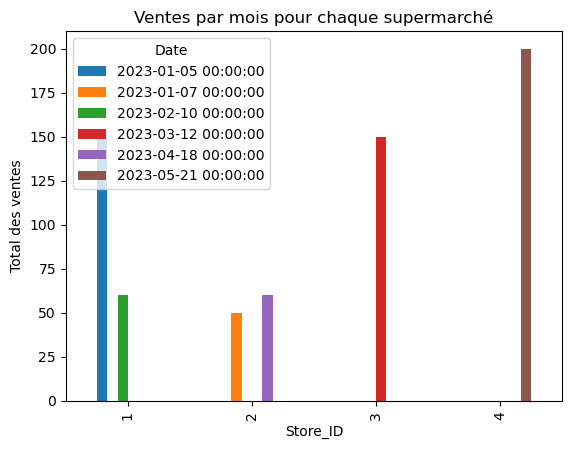

In [21]:
# Visualiser les ventes mensuelles
ventes_par_mois.unstack().plot(kind='bar', title='Ventes par mois pour chaque supermarché')
plt.ylabel('Total des ventes')
plt.show()



### Étape 3 : Identifier les catégories de produits les plus vendues

In [22]:
# Calculer les ventes par catégorie de produit
ventes_par_categorie = df_ventes.groupby('Product_Category')['Total_Sales'].sum()
ventes_par_categorie


Product_Category
Clothing        60.0
Electronics    350.0
Furniture      150.0
Groceries      110.0
Name: Total_Sales, dtype: float64

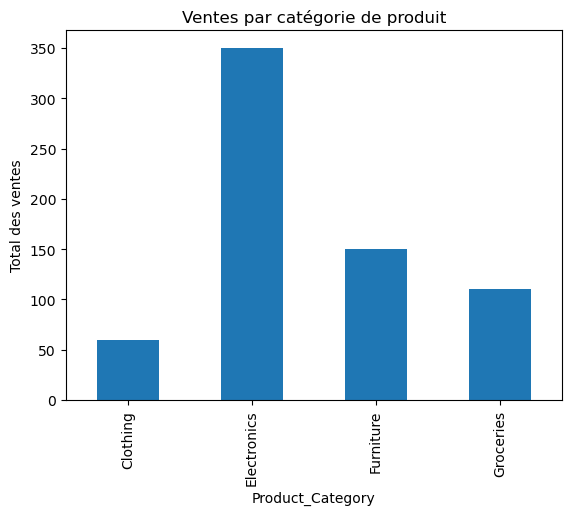

In [23]:
# Visualiser les ventes par catégorie de produit
ventes_par_categorie.plot(kind='bar', title='Ventes par catégorie de produit')
plt.ylabel('Total des ventes')
plt.show()

### Étape 4 : Étudier la répartition des dépenses des clients

In [24]:
# Répartition des dépenses par catégorie
depenses_par_categorie = df_clients.groupby('Product_Category')['Spent'].sum()
depenses_par_categorie

Product_Category
Clothing        60.0
Electronics    300.0
Furniture      150.0
Groceries       35.0
Name: Spent, dtype: float64

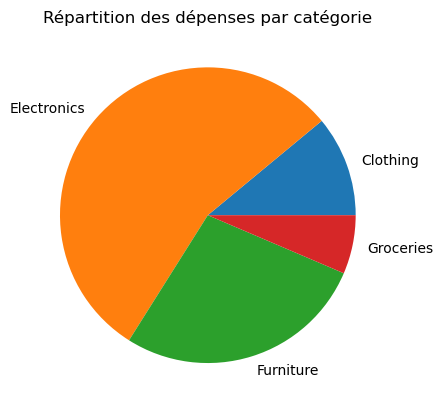

In [25]:
# Visualisation de la répartition
depenses_par_categorie.plot(kind='pie', title='Répartition des dépenses par catégorie')
plt.ylabel('')
plt.show()


### Étape 5 : Analyser la performance des employés

In [26]:
# Calculer la performance des employés par ventes
performance_employes = df_employes.groupby('Employee_Name')['Sales_Made'].sum()
performance_employes


Employee_Name
Alice      1500
Bob        2000
Charlie    1800
Diana      2200
Edward     1700
Name: Sales_Made, dtype: int64

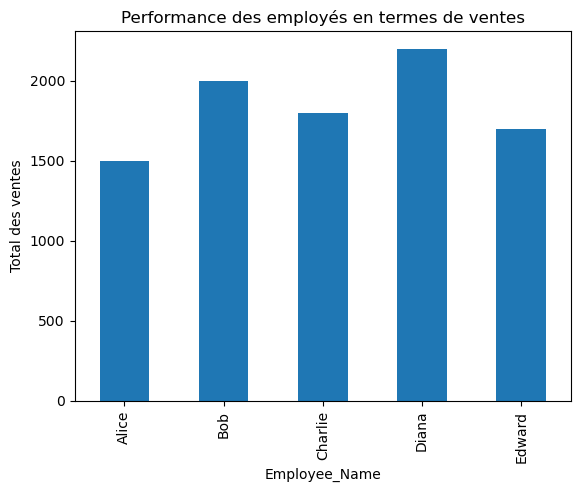

In [27]:
# Visualiser la performance des employés
performance_employes.plot(kind='bar', title='Performance des employés en termes de ventes')
plt.ylabel('Total des ventes')
plt.show()


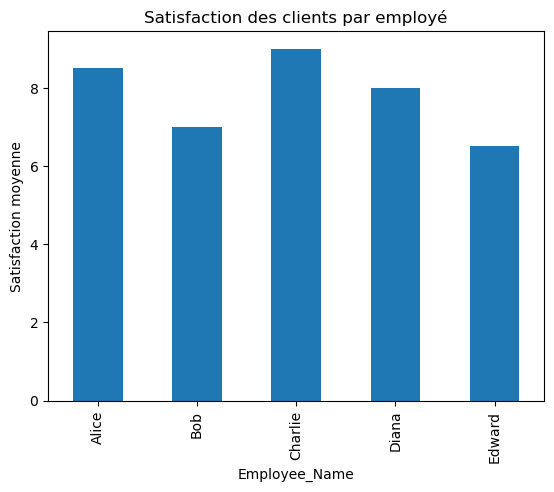

In [28]:
# Visualiser la satisfaction client par employé
satisfaction_employes = df_employes.groupby('Employee_Name')['Customer_Satisfaction'].mean()
satisfaction_employes.plot(kind='bar', title='Satisfaction des clients par employé')
plt.ylabel('Satisfaction moyenne')
plt.show()

### Étape 6 : Analyser la satisfaction des clients

In [29]:
# Satisfaction des clients par mois
satisfaction_par_mois = df_clients.groupby('Date')['Satisfaction_Score'].mean()
satisfaction_par_mois

Date
2023-01-05    9.0
2023-01-07    8.0
2023-02-10    7.5
2023-03-12    8.5
2023-04-18    9.5
Name: Satisfaction_Score, dtype: float64

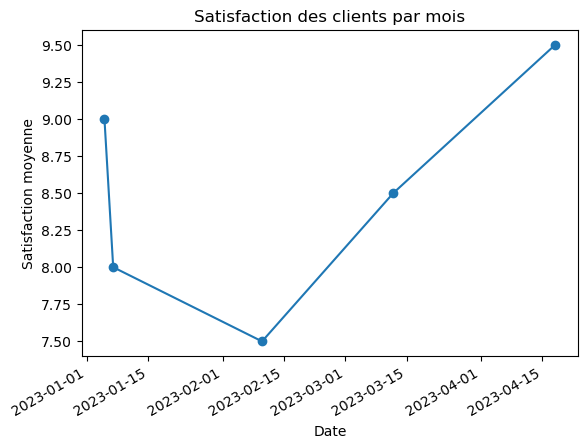

In [30]:
# Visualiser la satisfaction client par mois
satisfaction_par_mois.plot(kind='line', title='Satisfaction des clients par mois', marker='o')
plt.ylabel('Satisfaction moyenne')
plt.show()
